In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sman0\OneDrive\Desktop\Data Science Projects\Project-4\water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isna().sum() # We have missing values on the coulmns ph, sulfate and Trihalomethanes

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Handling the missing values

In [5]:
mode_ph = df['ph'].mode()[0] # filling the missing salary values with mode as its a categorical data
df['ph'].fillna(mode_ph, inplace=True)

mode_Sulfate = df['Sulfate'].mode()[0] # filling the missing salary values with mode as its a categorical data
df['Sulfate'].fillna(mode_Sulfate, inplace=True)

mode_Trihalomethanes = df['Trihalomethanes'].mode()[0] # filling the missing salary values with mode as its a categorical data
df['Trihalomethanes'].fillna(mode_Trihalomethanes, inplace=True)

C:\Users\sman0\AppData\Local\Temp\ipykernel_11552\1885079694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(mode_ph, inplace=True)
C:\Users\sman0\AppData\Local\Temp\ipykernel_11552\1885079694.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [6]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,129.000000,392.449580,19.903225,0.738000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,129.000000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,129.000000,402.883113,11.168946,77.488213,4.708658,1


In [7]:
df.isna().sum() 

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Creating Pipeline using LogisticRegression

In [8]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
model = Pipeline([('prep', StandardScaler()),('logr', LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

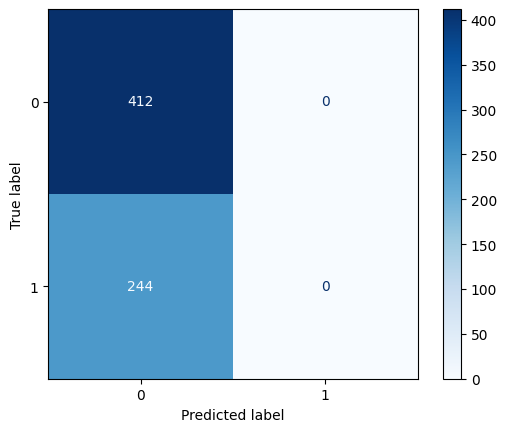

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test,cmap ="Blues")

In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [13]:
accuracy = model.score(X_test,y_test)
accuracy

0.6280487804878049

In [14]:
precision_score(y_true=y_test, y_pred=y_pred)

F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [15]:
recall_score(y_true=y_test, y_pred=y_pred)

0.0

In [16]:
f1_score(y_true=y_test, y_pred=y_pred)

0.0

# Creating Pipeline using svm

In [17]:
from sklearn.svm import SVC

In [18]:
model = Pipeline([('prep', StandardScaler()),('svm',SVC())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
model = Pipeline([('prep', StandardScaler()),('svm',SVC())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

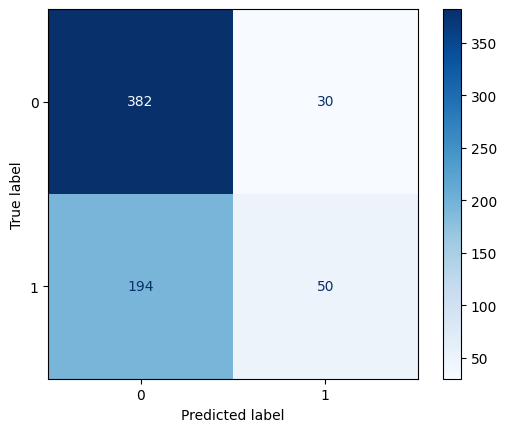

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test,cmap ="Blues")

In [21]:
accuracy = model.score(X_test,y_test)
accuracy

0.6585365853658537

In [22]:
precision_score(y_true=y_test, y_pred=y_pred)

0.625

In [23]:
recall_score(y_true=y_test, y_pred=y_pred)

0.20491803278688525

In [24]:
f1_score(y_true=y_test, y_pred=y_pred)

0.308641975308642

* In logistice regression we had 0% f1-score on scaled data However in svm we achieve 30% accuray on scaling in the same data. Therefore for this dataset svm is a better algorithm.